# KNN

In [111]:
import pandas as pd
import numpy as np

In [80]:
#فراخوانی دیتاست
data= pd.read_excel('./dataset2.xls',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.74,2.50,21.0,88,2.48,2.01,0.42,3.08,1.10,2.31,B
1,0.89,2.58,18.0,94,2.20,2.21,0.22,3.05,0.79,3.08,B
2,0.90,1.71,16.0,86,1.95,2.03,0.24,4.60,1.19,2.48,B
3,0.92,2.00,19.0,86,2.42,2.26,0.30,2.50,1.38,3.12,B
4,0.94,1.36,10.6,88,1.98,0.57,0.28,1.95,1.05,1.82,B


# هدف مشخص کردن دسته مربوط به فیچر لیبل دار میباشد(آخرین فیچر) 

In [ ]:
X=data.values[:, 0:10]
y=data.values[:, 10]

دیتاهایمان را به دو دسته برای تست و ترین مشخص میکنیم

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

# فرآیند انتخاب فیچر های مناسب

 با این کار ممکن است بتوانیم با انتخاب فیچر های مناسب دقت پیشبینی مدل خود را افزایش دهیم 

In [103]:
class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score,               
                 test_size=0.2, random_state=1):     
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
        
    def fit(self, X, y):
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:                 
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [104]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
#k_features = 1 
#به این معناست که یک به یک فیچر ها را بررسی کن
sbs.fit(X_train, y_train)

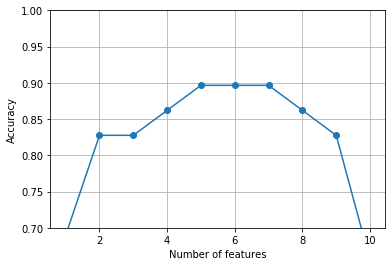

In [105]:
#نمودار زیر دقت پیشبینی برای تعداد فیچر ها را نشان میدهد
#به ما کمک میکند که متوجه شویم با استفاده از چند فیچر ، دقت پیش بینی ما بالاتر است
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [106]:
#برای استفاده از تمامی فیچر ها
k = list(sbs.subsets_[0])
print(data.columns[0:10][k])

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [107]:
#برای استفاده از تعداد فیچر مناسب
#تعدادی از فیچر ها را حذف میکند 
k2 = list(sbs.subsets_[3])
#سه تا از فیچر ها حذف میگردند
print(data.columns[0:10][k2])

Int64Index([0, 1, 4, 5, 6, 7, 8], dtype='int64')


In [108]:
# بدون در نظر گرفتن انتخاب فیچر 
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.8732394366197183
Test accuracy: 0.7222222222222222


In [109]:
# با درنظر گرفتن انتخاب فیچر
knn.fit(X_train[:, k2], y_train)
print('Training accuracy:', knn.score(X_train[:, k2], y_train))
print('Test accuracy:', knn.score(X_test[:, k2], y_test))

Training accuracy: 0.9577464788732394
Test accuracy: 0.9444444444444444


علی عسگری-9611415026